# **Previsão do Cargo Ideal**

## **Modelagem**  

Nesta etapa, construirei e avaliarei modelos de aprendizado de máquina para prever o cargo ideal na área de dados. O problema é tratado como uma tarefa de classificação supervisionada, onde o modelo será treinado com dados rotulados para aprender padrões e realizar previsões precisas.  

Seguirei um pipeline estruturado para a modelagem, incluindo as seguintes etapas:  

1. **Divisão dos Dados** – Separação do conjunto de dados em treino e teste para garantir uma avaliação justa do desempenho do modelo.  
2. **Treinamento** – Ajuste de diferentes algoritmos de classificação usando os dados de treinamento.  
3. **Otimização de Hiperparâmetros** – Ajuste fino dos modelos utilizando técnicas como validação cruzada e busca em grade/aleatória.  
4. **Avaliação** – Medição do desempenho dos modelos utilizando métricas como acurácia, precisão, recall e F1-score.  
5. **Interpretação dos Resultados** – Análise das características mais influentes nas previsões e comparação entre os modelos para selecionar a melhor abordagem.  

A modelagem tem como objetivo identificar qual algoritmo oferece o melhor equilíbrio entre precisão e interpretabilidade para auxiliar na recomendação do cargo ideal. Ao longo do processo, justificarei as escolhas de algoritmos e estratégias adotadas para garantir um modelo robusto e generalizável.

In [34]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### **1. Divisão dos Dados**

In [35]:
# Load the data.
X_train = pd.read_csv('../base/X_train.csv')
X_test = pd.read_csv('../base/X_test.csv')
y_train = pd.read_csv('../base/y_train.csv')
y_test = pd.read_csv('../base/y_test.csv')

Vendo a proporção dos dados alvo

In [36]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
cargo_cod
1            0.215091
7            0.187653
11           0.166585
0            0.125919
14           0.092112
4            0.041646
9            0.035767
6            0.024008
5            0.023518
12           0.023028
16           0.016169
2            0.009799
15           0.009799
17           0.007349
3            0.006369
13           0.005879
10           0.005390
8            0.003920
Name: proportion, dtype: float64

Test target proportion: 
cargo_cod
1            0.214612
7            0.187215
11           0.166667
0            0.125571
14           0.092466
4            0.042237
9            0.035388
6            0.023973
5            0.023973
12           0.023973
16           0.017123
2            0.009132
15           0.009132
17           0.006849
10           0.005708
3            0.005708
13           0.005708
8            0.004566
Name: proportion, dtype: float64


In [37]:
# Se y_train e y_test forem DataFrames, convertemos para Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()  
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()  

### **Treinamento**

Nesta etapa, realizaremos o treinamento dos modelos Logistic Regression e Support Vector Machine (SVM) para prever o cargo ideal na área de dados. Ambos são algoritmos de classificação supervisionada, mas possuem características distintas:

- Logistic Regression é um modelo linear amplamente utilizado para problemas de classificação binária e multiclasse. Ele estima a probabilidade de uma classe com base em uma combinação linear dos atributos de entrada.

- Support Vector Machine (SVM) é um modelo poderoso que encontra um hiperplano ótimo para separar as classes, sendo eficiente para problemas complexos com dados de difícil separação linear.

#### **Logistic Regression**  
Nesta subetapa, utilizamos a **Regressão Logística** para modelar a relação entre os atributos e os cargos previstos. O modelo será treinado e avaliado com métricas adequadas para problemas de classificação.  

In [38]:
# Inicializar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)

In [39]:
# Treinar o modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [40]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report1 = classification_report(y_test, y_pred)

In [41]:
# Exibir resultados
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(report1)

Acurácia do modelo: 0.3219

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.28      0.25      0.27       110
           1       0.28      0.44      0.34       188
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        21
           7       0.42      0.41      0.42       164
           8       0.00      0.00      0.00         4
           9       0.25      0.10      0.14        31
          10       0.00      0.00      0.00         5
          11       0.33      0.49      0.40       146
          12       1.00      0.05      0.09        21
          13       0.20      0.20      0.20         5
          14       0.33      0.33      0.33        81
          15       0.00      0.00      0.00         8
          16       0.00  

#### **Support Vector Machine (SVM)**  
Aqui, aplicaremos um **SVM com kernel adequado** para encontrar a melhor separação entre as classes. Ajustaremos hiperparâmetros para garantir um desempenho otimizado e compararemos os resultados com a Regressão Logística.

In [42]:
# Inicializar o modelo SVM
svm_model = LinearSVC()

In [43]:
# Definir hiperparâmetros para a busca
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],    # Regularização
    'max_iter': [1000, 5000, 10000]  # Iterações para convergência
}

In [44]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Treinar o modelo otimizando os hiperparâmetros
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 5000, 10000]},
             scoring='accuracy', verbose=1)

In [45]:
# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

In [46]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report2 = classification_report(y_test, y_pred)

In [47]:
# Exibir os melhores hiperparâmetros e o desempenho final
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
print(f"Acurácia do melhor modelo LinearSVC: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(report2)

Melhores hiperparâmetros: {'C': 0.1, 'max_iter': 1000}
Acurácia do melhor modelo LinearSVC: 0.3265

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.31      0.23      0.26       110
           1       0.28      0.45      0.35       188
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        21
           7       0.39      0.42      0.41       164
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        31
          10       0.00      0.00      0.00         5
          11       0.34      0.51      0.41       146
          12       0.00      0.00      0.00        21
          13       0.25      0.20      0.22         5
          14       0.36      0.38      0.37        81
       

### **Comparando os Modelos**

Nesta seção, compararei o desempenho dos modelos treinados para prever o cargo ideal na área de dados. Serão analisados dois modelos:

A comparação será feita utilizando métricas de avaliação, como acurácia, precisão, recall e F1-score. Além disso, apresentarei as matrizes de confusão de ambos os modelos para visualizar onde ocorrem os erros de classificação. Essa análise permitirá identificar qual abordagem oferece o melhor equilíbrio entre desempenho e generalização.

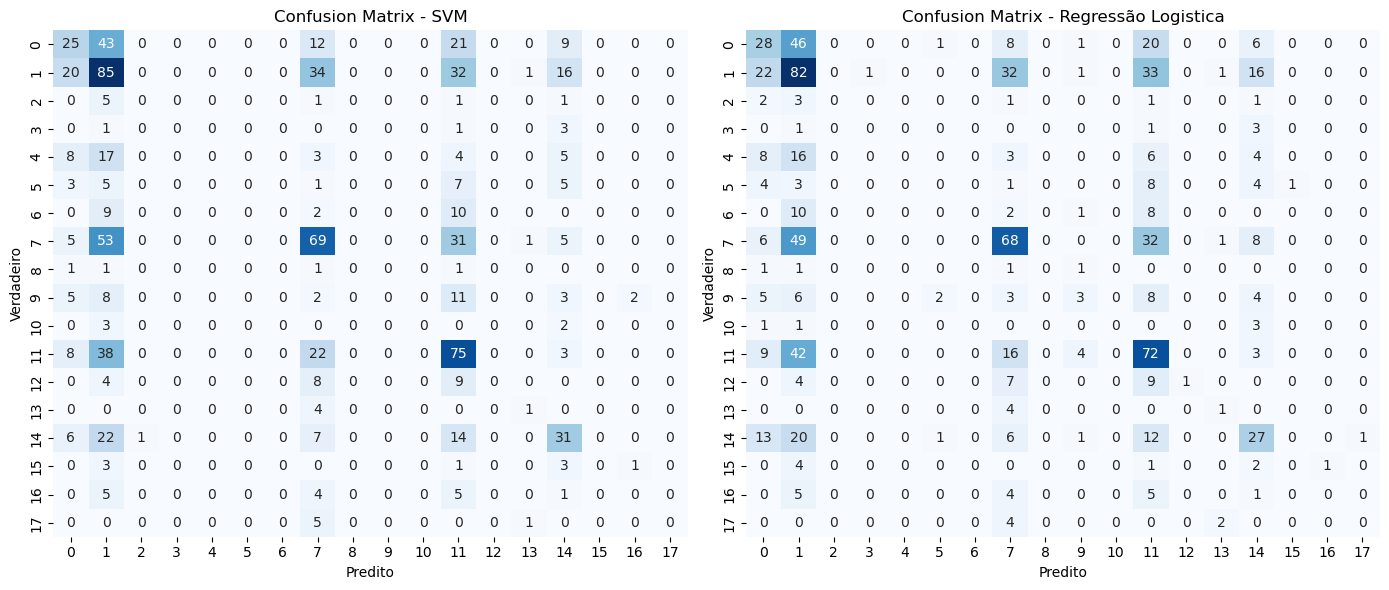

In [48]:
# Criar matrizes de confusão
cm_best = confusion_matrix(y_test, y_pred)  # Para o best_model do GridSearch
cm_default = confusion_matrix(y_test, model.predict(X_test))  # Para o modelo original

# Criar subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap para o modelo otimizado pelo GridSearchCV
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=best_model.classes_, yticklabels=best_model.classes_, ax=ax[0])
ax[0].set_title("Confusion Matrix - SVM")
ax[0].set_xlabel("Predito")
ax[0].set_ylabel("Verdadeiro")

# Heatmap para o modelo original (sem otimização)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_, ax=ax[1])
ax[1].set_title("Confusion Matrix - Regressão Logistica")
ax[1].set_xlabel("Predito")
ax[1].set_ylabel("Verdadeiro")

# Ajustar espaçamento
plt.tight_layout()
plt.show()

In [49]:
# Comparando os reportes de classificação
print("Relatório de Classificação - Regressão Logística:")
print(report1)
print("\nRelatório de Classificação - SVM:")
print(report2)

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

           0       0.28      0.25      0.27       110
           1       0.28      0.44      0.34       188
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        21
           7       0.42      0.41      0.42       164
           8       0.00      0.00      0.00         4
           9       0.25      0.10      0.14        31
          10       0.00      0.00      0.00         5
          11       0.33      0.49      0.40       146
          12       1.00      0.05      0.09        21
          13       0.20      0.20      0.20         5
          14       0.33      0.33      0.33        81
          15       0.00      0.00      0.00         8
          16       0.00      0.

Os dois modelos, **Regressão Logística** e **SVM**, foram avaliados com base nas métricas de **precisão**, **recall** e **f1-score**. Ambas as abordagens apresentaram desafios significativos, mas vamos analisar os resultados em detalhes para entender suas diferenças.


**Desempenho Geral**
- **Acurácia**:  
  - **Regressão Logística**: Acurácia de **32%**.  
  - **SVM**: Acurácia de **33%**.  
  Ambas as acurácias são relativamente baixas, o que pode indicar que os modelos não estão conseguindo generalizar bem os dados, especialmente com uma grande quantidade de classes e desbalanceamento nas distribuições de classes.


**Análise por Classe**
- **Classes Raras (com baixo suporte)**:
  - Ambas as abordagens têm desempenho muito ruim nas classes com baixo suporte, como as classes 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16 e 17. A precisão e o recall nessas classes são zero, o que indica que o modelo não está conseguindo prever corretamente essas classes. Isso pode ser causado pela **baixa quantidade de amostras** para essas classes e pelo **desbalanceamento** nos dados.
  
- **Classes mais frequentes**:
  - **Classe 1 (188 amostras)**: A SVM tem um desempenho ligeiramente melhor que a regressão logística, com **precisão de 0.28** e **recall de 0.45**, enquanto a regressão logística tem **precisão de 0.28** e **recall de 0.44**.
  - **Classe 7 (164 amostras)**: Aqui, a **Regressão Logística** tem um desempenho ligeiramente melhor, com **precisão de 0.42** e **recall de 0.41**, enquanto a SVM apresenta **precisão de 0.39** e **recall de 0.42**.
  - **Classe 11 (146 amostras)**: A **SVM** apresenta um melhor **recall de 0.51** e **f1-score de 0.41**, enquanto a **Regressão Logística** tem um **recall de 0.49** e **f1-score de 0.40**.


**Resumo das Diferenças entre os Modelos**
- **SVM (LinearSVC)** tende a ter um **melhor desempenho** no **recall** de classes com mais amostras, mas não consegue prever bem as classes raras.
- **Regressão Logística** tem uma **leve vantagem** em termos de precisão para algumas classes, mas, no geral, os resultados são muito similares entre os dois modelos.
- Ambos os modelos **não performam bem em classes desbalanceadas**,

#### **Conclusão**
Ambos os modelos apresentam um desempenho similar e não conseguem lidar bem com o desbalanceamento das classes. Embora a SVM mostre um desempenho ligeiramente superior em termos de recall para algumas classes, a **Regressão Logística** oferece um equilíbrio razoável em várias métricas. A próxima etapa seria considerar **técnicas de reamostragem** ou o uso de **modelos mais robustos** como **árvores de decisão** ou **florestas aleatórias**, ou até mesmo **técnicas de ajuste de classe**, para lidar com o desbalanceamento e melhorar a capacidade de generalização dos modelos.